In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date, datetime

In [18]:
employeesDF = pd.read_csv('./work/viikko2/datasets/employees.csv')
departmentsDF = pd.read_csv('./work/viikko2/datasets/departments.csv')

## Tehtävä 1

In [19]:
empDesc = employeesDF.describe()
employeesDF.info()
employeesDF.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15 non-null     int64  
 1   fname   15 non-null     object 
 2   lname   15 non-null     object 
 3   salary  15 non-null     int64  
 4   bdate   15 non-null     object 
 5   email   15 non-null     object 
 6   dep     15 non-null     int64  
 7   phone1  15 non-null     int64  
 8   phone2  5 non-null      float64
 9   image   15 non-null     object 
 10  gender  15 non-null     int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 1.4+ KB


,id,fname,lname,salary,bdate,email,dep,phone1,phone2,image,gender
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,True,False,False


In [20]:
employeesDF.nlargest(3, 'salary')


,id,fname,lname,salary,bdate,email,dep,phone1,phone2,image,gender
0,1,Iso,Pomo,10000,1960-01-01,iso.pomo@firma.fi,1,12545054,65665661.0,images/employees/m1.png,0
7,8,Jaana,Jämäkkä,3250,1979-06-01,jaana.jamakka@gmail.com,4,43545054,NaN,images/employees/f3.png,1
9,10,Peke,Pomo,3250,1990-10-01,peke.pomo@hotmail.com,5,65545054,NaN,images/employees/m7.png,0


In [21]:
employeesDF.nsmallest(3, 'salary')

,id,fname,lname,salary,bdate,email,dep,phone1,phone2,image,gender
10,11,Taavi,Tanakka,2000,1985-03-03,taavi.tanakka@firma.fi,5,35345054,NaN,images/employees/m8.png,0
11,12,Maija,Mainio,2200,1975-07-06,maija.mainio@hotmail.com,5,12564654,NaN,images/employees/f4.png,1
12,13,Mikko,Meikäläinen,2250,1986-03-21,mikko.meikalainen@firma.fi,5,12523654,NaN,images/employees/m9.png,0


In [22]:
empDepDF = employeesDF.merge(departmentsDF, how='inner', on='dep').drop(columns='image')

## Tehtävä 2

In [23]:
empDepDF.shape[0]

15

In [24]:
empDepDF['gender'].value_counts()

gender
0    10
1     5
Name: count, dtype: int64

In [25]:
empDepDF['gender'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

gender
0    0.7
1    0.3
Name: proportion, dtype: float64

In [26]:
empDepDF['salary'].min()

2000

In [27]:
empDepDF['salary'].max()

10000

In [28]:
empDepDF['salary'].mean()

3123.3333333333335

In [29]:
tuotekehitysSalMedian = empDepDF[empDepDF['dname'] == 'Tuotekehitys']['salary'].mean()

print(tuotekehitysSalMedian)

2787.5


In [30]:
empDepDF['phone2'].isna().sum()

10

In [31]:
def calculateAge(bdate):
    bdate = datetime.strptime(bdate, "%Y-%m-%d").date()
    today = date.today()
    return today.year - bdate.year - ((today.month, 
                                      today.day) < (bdate.month, 
                                                    bdate.day))

empDepDF['age'] = empDepDF['bdate'].apply(calculateAge)

age_bins = range(15, 75, 5)

empDepDF['age_group'] = pd.cut(empDepDF['age'], bins=age_bins, labels=age_bins[1:])

<Axes: >

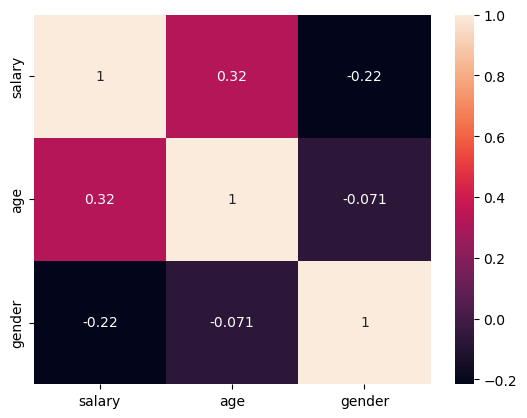

In [32]:
salAgeGenderDF = empDepDF[['salary', 'age', 'gender']]

corr = salAgeGenderDF.corr()

sb.heatmap(corr, annot=True)